<a href="https://colab.research.google.com/github/eren-darici/computer-vision-bim496/blob/main/Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Convolution

In [ ]:
def convolve(img: np.array, kernel: np.array):
  """Computes convolved image with given kernel"""

  # initialize array
  convoluted_img = []

  # shapes
  kernel_w, kernel_h = kernel.shape
  img_w, img_h = img.shape


  # loop
  for x_increment in range(img_w - kernel_w + 1):
    # temporary variable for rows
    temp = []

    for y_increment in range(img_h - kernel_h + 1):
      # temporary result for multiplication
      temp_result = 0

      for x in range(kernel_w):
        for y in range(kernel_h):
          temp_result += img[x + x_increment][y + y_increment] * kernel[x][y]
      
      temp.append(temp_result)
    
    convoluted_img.append(temp)

  return convoluted_img

# Utility

In [ ]:
def read_img(filepath: str):
  img = Image.open(filepath)
  img = np.array(img)

  print(img.shape)

  print(f"Image loaded: {filepath}")
  return img

In [ ]:
def show_image(img: np.array):
  plt.imshow(img, cmap='gray')

# Sobel Filters

## 3x3

In [ ]:
sobel_horizontal = np.array([[1, 2, 1], 
                             [0, 0, 0], 
                             [-1, -2, -1]])

In [ ]:
sobel_vertical = np.array([[1, 0, -1], 
                           [2, 0, -2], 
                           [1, 0, -1]])

## 5x5

In [ ]:
sobel_horizontal2 = np.array([
                             [2, 2, 4, 2, 2], 
                             [1, 1, 2, 1, 1], 
                             [0, 0, 0, 0, 0],
                             [-1, -1, -2, -1, -1],
                             [-2, -2, -4, -2, -2]
                              ])

In [ ]:
sobel_vertical2 = np.array([
                             [2, 1, 0, -1, -2], 
                             [2, 1, 0, -1, -2], 
                             [4, 2, 0, -2, -4],
                             [2, 1, 0, -1, -2],
                             [2, 1, 0, -1, -2]
                              ])

# Application

In [ ]:
img = read_img("/content/image2.png")

(375, 1242)
Image loaded: /content/image2.png


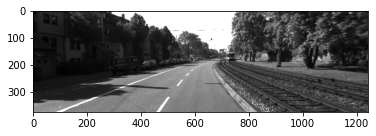

In [ ]:
show_image(img)

In [ ]:
img.shape

(375, 1242)

In [ ]:
image_conv_horizontal = convolve(img=img, kernel=sobel_horizontal2)

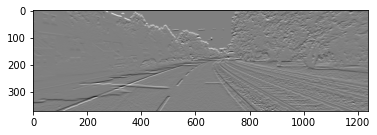

In [ ]:
show_image(image_conv_horizontal)

In [ ]:
image_conv_vertical = convolve(img=img, kernel=sobel_vertical2)

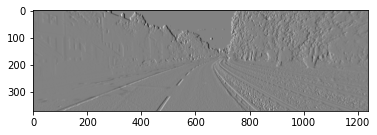

In [ ]:
show_image(image_conv_vertical)

In [ ]:
magnitude_of_gradients = np.add(image_conv_horizontal, image_conv_vertical)

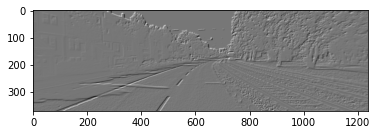

In [ ]:
show_image(magnitude_of_gradients)